In [104]:
import numpy as np 
import pandas as pd 

In [151]:
df = pd.read_csv('laptop_price_processed.csv')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   Ram               1303 non-null   int64  
 5   OpSys             1303 non-null   object 
 6   Weight            1303 non-null   float64
 7   Price_euros       1303 non-null   float64
 8   IPS_Panel         1303 non-null   int64  
 9   Retina_Display    1303 non-null   int64  
 10  Touchscreen       1303 non-null   int64  
 11  Resolution_X      1303 non-null   int64  
 12  Resolution_Y      1303 non-null   int64  
 13  Total_Pixels      1303 non-null   int64  
 14  High_Resolution   1303 non-null   int64  
 15  Product_Series    1303 non-null   object 
 16  Cpu_Brand         1303 non-null   object 


In [153]:
from sklearn.preprocessing import LabelEncoder

categorical_col = ["Company", "TypeName", "OpSys", "Cpu_Brand", "Cpu_Series", "Gpu_Manufacturer", "Gpu_Series", "Memory_Type", "Product_Series"]

le = LabelEncoder()

for col in categorical_col:
  df[col] = le.fit_transform(df[col])

In [154]:
from sklearn.preprocessing import StandardScaler

numeric_col = ["Inches", "Ram", "Weight", "IPS_Panel", "Retina_Display", "Touchscreen", "Resolution_X", "Resolution_Y", "Clock_Speed", "Memory_Size(GB)", 'Total_Pixels']

sc = StandardScaler()

for col in numeric_col:
  df[col] = sc.fit_transform(df[[col]])

In [155]:
# X = df[['Clock_Speed', 'TypeName', 'Cpu_Series', 'Ram', 'Total_Pixels', 'Company']]
# y = df['Price_euros']

In [156]:
# X = df.drop(columns=['laptop_ID', 'Price_euros', 'Inches', 'IPS_Panel', 'Retina_Display', 'Touchscreen', 'TypeName', 'Cpu_Brand', 'Gpu_Manufacturer', 'High_Resolution'])
# y = df['Price_euros']

In [157]:
X = df.drop(columns=['laptop_ID', 'Price_euros'])
y = df['Price_euros']

In [158]:
X

,Company,TypeName,Inches,Ram,OpSys,Weight,IPS_Panel,Retina_Display,Touchscreen,Resolution_X,...,Total_Pixels,High_Resolution,Product_Series,Cpu_Brand,Cpu_Series,Clock_Speed,Gpu_Manufacturer,Gpu_Series,Memory_Type,Memory_Size(GB)
0,1,4,-1.204407,-0.075195,8,-1.005283,1.603079,8.697532,-0.415713,1.345362,...,1.385714,1,140,1,10,0.002426,2,4,4,-1.026162
1,1,4,-1.204407,-0.075195,8,-1.050381,-0.623799,-0.114975,-0.415713,-0.919776,...,-0.627576,0,141,1,10,-0.985431,2,2,0,-1.026162
2,7,3,0.408772,-0.075195,4,-0.268684,-0.623799,-0.114975,-0.415713,0.050997,...,-0.068457,0,50,1,10,0.397569,2,2,4,-0.759244
3,1,4,0.268495,1.498767,8,-0.313782,1.603079,8.697532,-0.415713,1.992544,...,2.168021,1,140,1,11,0.792712,0,9,4,-0.225410
4,1,4,-1.204407,-0.075195,8,-1.005283,1.603079,8.697532,-0.415713,1.345362,...,1.385714,1,140,1,10,1.582997,2,4,4,-0.759244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,-0.713439,-0.862176,5,-0.358880,1.603079,-0.114975,2.405506,0.050997,...,-0.068457,0,223,1,11,0.397569,2,2,4,-1.026162
1299,10,0,-1.204407,1.498767,5,-1.110512,1.603079,-0.114975,2.405506,2.639726,...,2.582183,1,223,1,11,0.397569,2,2,4,-0.225410
1300,10,3,-0.713439,-1.255667,5,-0.809859,-0.623799,-0.114975,-0.415713,-1.069437,...,-0.805114,0,121,1,7,-1.380574,2,2,0,-1.159620
1301,7,3,0.408772,-0.468686,5,0.227393,-0.623799,-0.114975,-0.415713,-1.069437,...,-0.805114,0,2,1,11,0.397569,0,9,2,0.842259


In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [160]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [161]:
from sklearn.metrics import r2_score

y_pred = lr_model.predict(X_test)
print(f'Accuracy {r2_score(y_test, y_pred)}')

Accuracy 0.7731493626116954


In [162]:
import warnings
warnings.filterwarnings('ignore')

In [163]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import RandomForestRegressor

# params = {
#   'n_estimators' : [456, 234, 389, 523],
#   'max_depth' : [67, 74, 47],
#   'min_samples_split' : [3, 6, 7],
#   'min_samples_leaf' : [5, 4, 7],
#   'criterion' : ['squared_error', 'absolute_error', 'poisson'],
#   'min_impurity_decrease' : [0.01, 0.001],
#   'max_features' : ['sqrt', 'log2']
# }

# grid = GridSearchCV(estimator=RandomForestRegressor(random_state=21), 
#                     param_grid=params, 
#                     cv=5, 
#                     scoring='accuracy', 
#                     n_jobs = -1)

# grid.fit(X_train, y_train)

# print("Best Parameters:", grid.best_params_)
# rf_model = grid.best_estimator_

In [164]:
# {'criterion': 'squared_error', 'max_depth': 67, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 456}
# {'criterion': 'squared_error', 'max_depth': 67, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 175}
# {'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 127}
# {'criterion': 'squared_error', 'max_depth': 56, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 114}
# {'criterion': 'absolute_error', 'max_depth': 56, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 114}
# {'criterion': 'squared_error', 'max_depth': 56, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 114}
# {'criterion': 'squared_error', 'max_depth': 67, 'max_features': 'sqrt', 'min_impurity_decrease': 0.01, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 456}

In [165]:
from sklearn.ensemble import RandomForestRegressor

rfreg_model = RandomForestRegressor(
  # n_estimators=132, max_depth=23, criterion='squared_error', random_state=21, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', min_impurity_decrease=0.01
)
rfreg_model.fit(X_train, y_train)

RandomForestRegressor()

In [166]:
y_pred = rfreg_model.predict(X_test)
from sklearn.metrics import r2_score
print(f'Accuracy {r2_score(y_test, y_pred)}')

Accuracy 0.8660063656294686


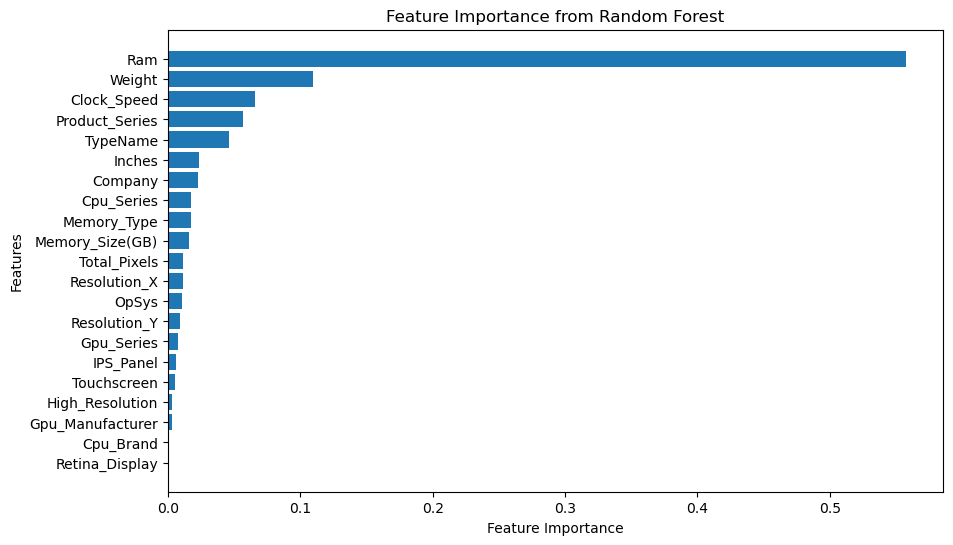

In [167]:
import matplotlib.pyplot as plt

feature_importances = rfreg_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [168]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 1042, number of used features: 20
[LightGBM] [Info] Start training from score 1129.882408


LGBMRegressor()

In [169]:
  # boosting_type='dart',
  # n_estimators=195, 
  # learning_rate=0.1, 
  # max_depth=15, 
  # random_state=21


In [170]:
from sklearn.metrics import r2_score

y_pred = lgbm.predict(X_test)
print(f'Accuracy {r2_score(y_test, y_pred)}')

Accuracy 0.8338790152931304


In [171]:
from xgboost import XGBRegressor
xgbreg = XGBRegressor(
  # objective='reg:squarederror', max_depth=10, eta=0.1, max_leaf_nodes=21, random_state=21, subsample=0.1
 )
xgbreg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [172]:
from sklearn.metrics import r2_score

y_pred = xgbreg.predict(X_test)
print(f'Accuracy {r2_score(y_test, y_pred)}')

Accuracy 0.8833872089009884


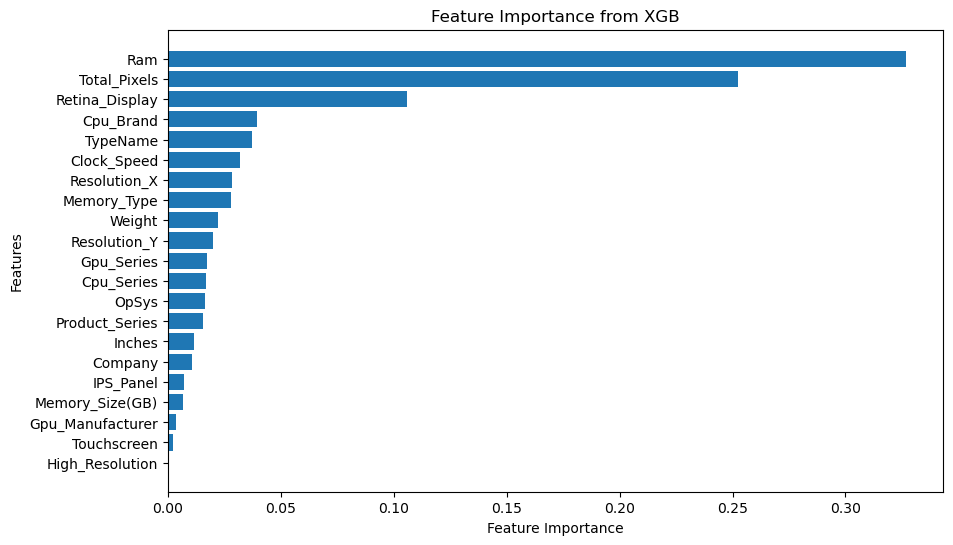

In [173]:
feature_importances = xgbreg.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from XGB')
plt.gca().invert_yaxis()
plt.show()

In [174]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(
  # criterion='poisson', max_depth=35, min_samples_leaf=3, min_samples_split=2
  )
dtreg.fit(X_train, y_train)

DecisionTreeRegressor()

In [175]:
y_pred = dtreg.predict(X_test)
print(f'Accuracy {r2_score(y_test, y_pred)}')

Accuracy 0.8501004375234208


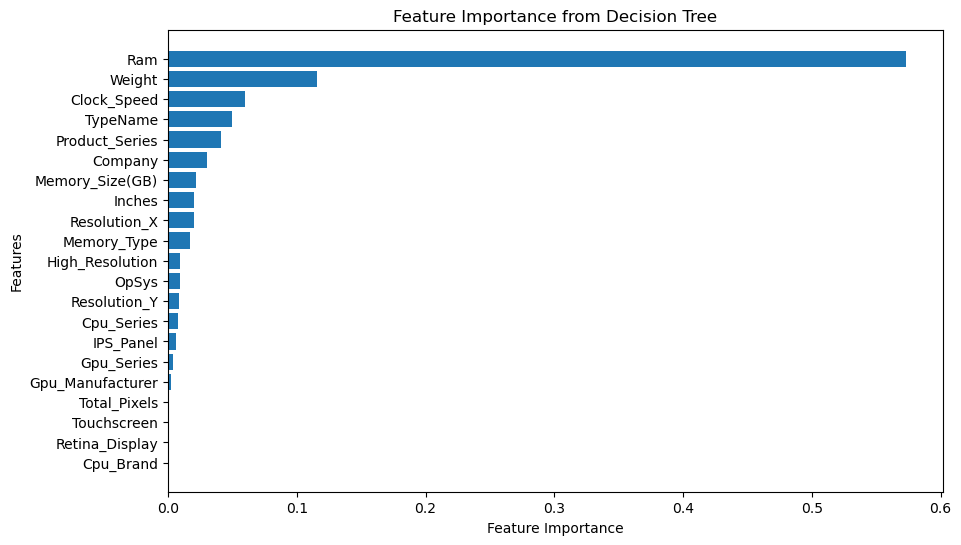

In [176]:
feature_importances = dtreg.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.show()